In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#jika versi google collab
# from google.colab import files
# upload= files.upload()

In [3]:
# jika versi collab
# dataset = pd.read_csv('marketing_campaign.csv', sep=';')
# dataset

# versi jupyter lab
dataset = pd.read_csv('Stage 1/marketing/marketing_campaign.csv', sep=';')
dataset.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
449,1142,1953,PhD,Married,55707.0,0,1,2013-12-22,91,208,...,3,0,0,0,0,0,0,3,11,0
1989,9797,1956,Graduation,Married,58116.0,0,1,2014-04-13,38,228,...,2,0,0,0,0,0,0,3,11,0
1574,8685,1977,Graduation,Married,42014.0,1,0,2012-08-17,56,244,...,8,0,0,0,0,0,0,3,11,1
475,178,1956,Graduation,Married,62503.0,0,1,2013-02-18,40,478,...,5,0,0,0,0,0,0,3,11,0
1882,5180,1968,PhD,Divorced,50616.0,0,1,2014-04-18,56,128,...,7,0,0,0,0,0,0,3,11,0


In [4]:
df = dataset.copy()

#### Handle Missing Value 

In [5]:
df.isnull().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                  True
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

Kolom Income terdapat Missing Value 24 baris

Handle Missing Value with Median Value

In [6]:
df.Income = df.Income.fillna(df.Income.median())

#### Penambahan Fitur

1. Fitur Total Anak

In [7]:
df['dependents']= df.Kidhome + df.Teenhome
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,dependents
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,2
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,0,3,11,0,1
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,0,0,1,0,0,3,11,0,3
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,1,0,0,0,0,3,11,0,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,0,3,11,0,1


2. Fitur Usia

In [8]:
df['Age'] = 2022 - df.Year_Birth
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,dependents,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,0,65
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,2,68
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,0,57
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,1,38
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,1,41


3. Fitur Kelompok Usia

In [9]:
df['Segmentation']=np.where(df['Age']<=35, "Young",
                               np.where(df['Age']<=50, 'Adult',
                                        np.where(df['Age']<75, 'Mature', 'Old')))
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,dependents,Age,Segmentation
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,3,11,1,0,65,Mature
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,3,11,0,2,68,Mature
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,0,57,Mature
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,3,11,0,1,38,Adult
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,1,41,Adult


4. Fitur Total Produk

In [10]:
# Total Product
prod_cols = [col for col in df.columns if 'Mnt' in col]
prod_cols
df['Total_Prod'] = (df[prod_cols].sum(axis=1)) 
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,dependents,Age,Segmentation,Total_Prod
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,3,11,1,0,65,Mature,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,3,11,0,2,68,Mature,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,3,11,0,0,57,Mature,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,3,11,0,1,38,Adult,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,3,11,0,1,41,Adult,422


5. Fitur Total Pembayaran

In [11]:
# Total Purchases
purchases_cols = [col for col in df.columns if 'Purchases' in col]
purchases_cols
df['Total_Purchases'] = df[purchases_cols].sum(axis=1)
df['Total_Purchases'] = df['Total_Purchases'] - df['NumDealsPurchases'] 
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,dependents,Age,Segmentation,Total_Prod,Total_Purchases
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,3,11,1,0,65,Mature,1617,22
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,3,11,0,2,68,Mature,27,4
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,0,57,Mature,776,20
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,3,11,0,1,38,Adult,53,6
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,0,1,41,Adult,422,14


#### Seleksi Fitur

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [14]:
train.shape, test.shape

((1792, 34), (448, 34))

#### Handle Outliers


1. Produk

In [15]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 10
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

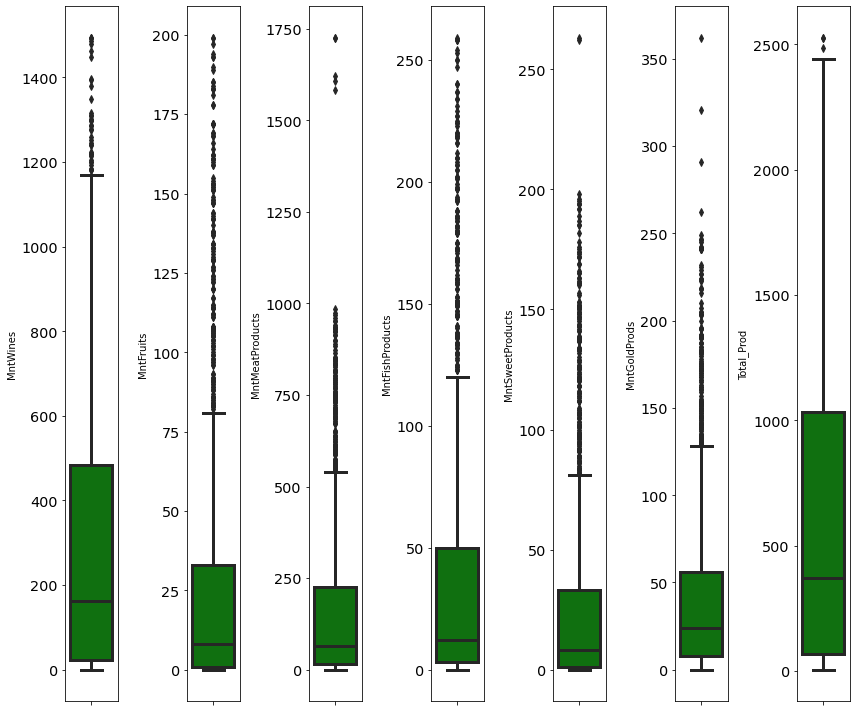

In [16]:
products = ['MntWines','MntFruits','MntMeatProducts', 'MntFishProducts','MntSweetProducts', 'MntGoldProds', 'Total_Prod']
products
for i in range(0, len(products)):
  plt.subplot(1, len(products),i+1)
  sns.boxplot(y=train[products[i]],color="green",orient='v')
  plt.tight_layout()

In [17]:
# outliers = ['MntMeatProducts', 'MntGoldProds', 'MntFishProducts']
for i in ['MntMeatProducts']:
  print(f'Jumlah baris sebelum memfilter',i, 'outlier:', len(train))
  a = len(train)
  train=train[train[i]<=1500]
  print(f'Jumlah baris setelah memfilter',i, 'outlier:', len(train))
  b = len(train)
  print (f'persen yang dibuang : {100-((b/a)*100)}')

Jumlah baris sebelum memfilter MntMeatProducts outlier: 1792
Jumlah baris setelah memfilter MntMeatProducts outlier: 1787
persen yang dibuang : 0.2790178571428612


In [18]:
for i in ['MntGoldProds']:
  print(f'Jumlah baris sebelum memfilter',i, 'outlier:', len(train))
  a = len(train)
  train=train[train[i]<=250]
  print(f'Jumlah baris setelah memfilter',i, 'outlier:', len(train))
  b = len(train)
  print (f'persen yang dibuang : {100-((b/a)*100)}')

Jumlah baris sebelum memfilter MntGoldProds outlier: 1787
Jumlah baris setelah memfilter MntGoldProds outlier: 1783
persen yang dibuang : 0.22383883603805543


In [19]:
for i in ['MntSweetProducts']:
  print(f'Jumlah baris sebelum memfilter',i, 'outlier:', len(train))
  a = len(train)
  train=train[train[i]<=250]
  print(f'Jumlah baris setelah memfilter',i, 'outlier:', len(train))
  b = len(train)
  print (f'persen yang dibuang : {100-((b/a)*100)}')

Jumlah baris sebelum memfilter MntSweetProducts outlier: 1783
Jumlah baris setelah memfilter MntSweetProducts outlier: 1782
persen yang dibuang : 0.056085249579368224


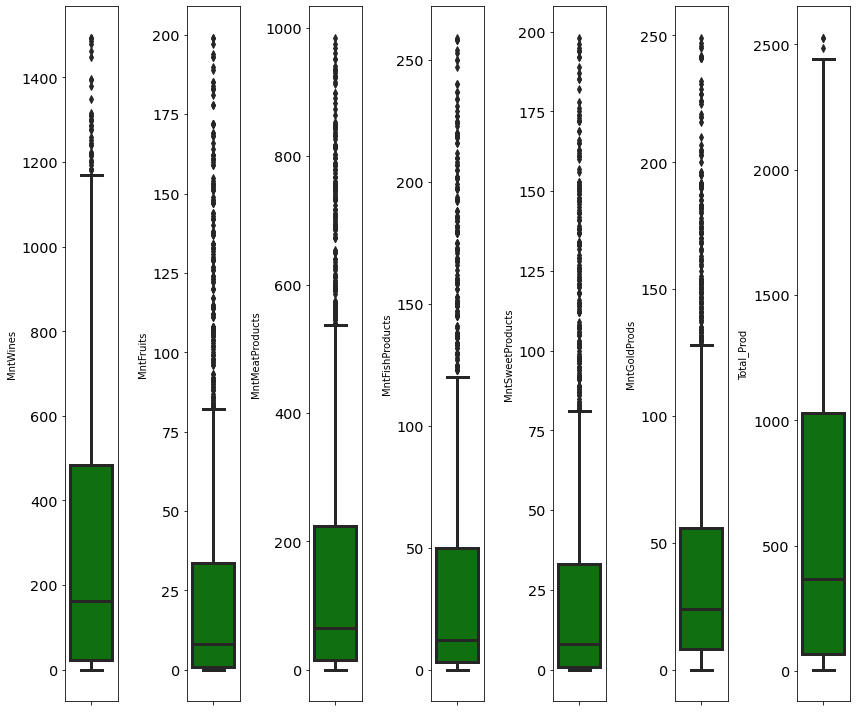

In [20]:
products = ['MntWines','MntFruits','MntMeatProducts', 'MntFishProducts','MntSweetProducts', 'MntGoldProds', 'Total_Prod']
products
for i in range(0, len(products)):
  plt.subplot(1, len(products),i+1)
  sns.boxplot(y=train[products[i]],color="green",orient='v')
  plt.tight_layout()

2. Pembayaran/Purchases

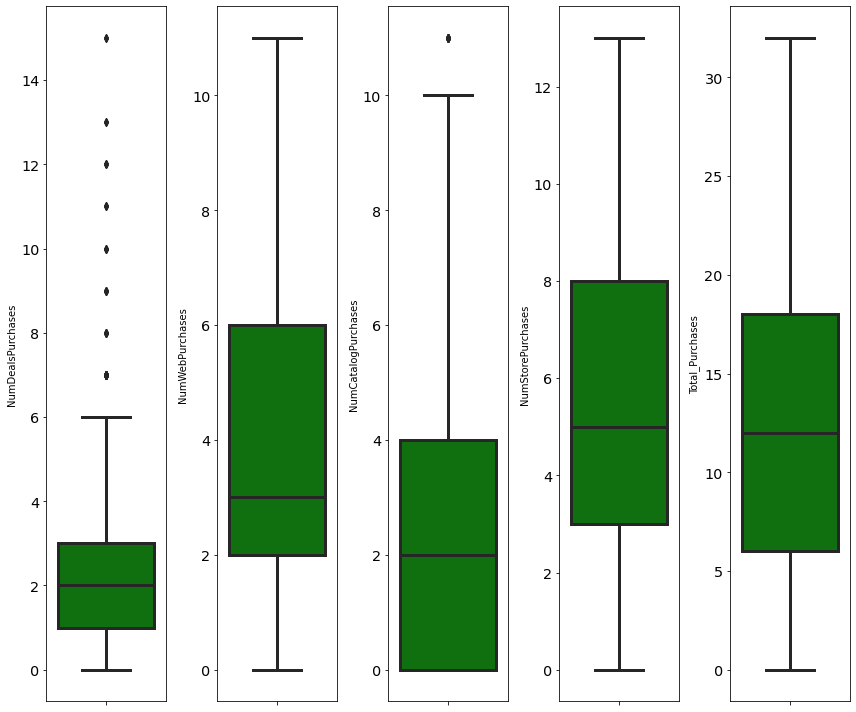

In [21]:
purchases = ['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases','Total_Purchases']
purchases
for i in range(0, len(purchases)):
  plt.subplot(1, len(purchases),i+1)
  sns.boxplot(y=train[purchases[i]],color="green",orient='v')
  plt.tight_layout()

In [22]:
for i in ['NumCatalogPurchases']:
  print(f'Jumlah baris sebelum memfilter',i, 'outlier:', len(train))
  a = len(train)
  train=train[train[i]<=10]
  print(f'Jumlah baris setelah memfilter',i, 'outlier:', len(train))
  b = len(train)
  print (f'persen yang dibuang : {100-((b/a)*100)}')

Jumlah baris sebelum memfilter NumCatalogPurchases outlier: 1782
Jumlah baris setelah memfilter NumCatalogPurchases outlier: 1766
persen yang dibuang : 0.8978675645342236


In [23]:
for i in ['NumDealsPurchases']:
  print(f'Jumlah baris sebelum memfilter',i, 'outlier:', len(train))
  a = len(train)
  train=train[train[i]<=13]
  print(f'Jumlah baris setelah memfilter',i, 'outlier:', len(train))
  b = len(train)
  print (f'persen yang dibuang : {100-((b/a)*100)}')

Jumlah baris sebelum memfilter NumDealsPurchases outlier: 1766
Jumlah baris setelah memfilter NumDealsPurchases outlier: 1763
persen yang dibuang : 0.16987542468855565


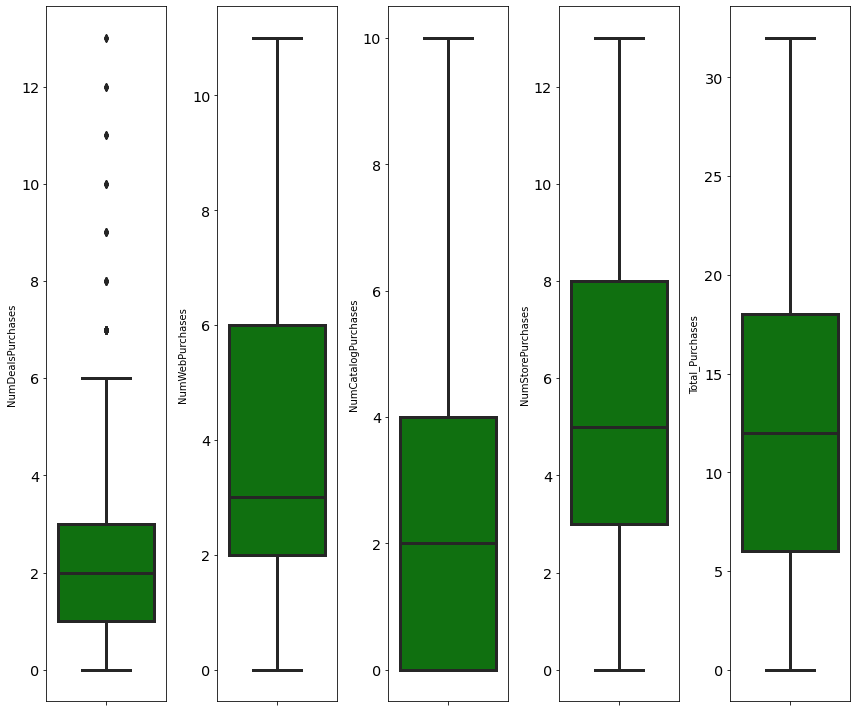

In [24]:
purchases = ['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases','Total_Purchases']
purchases
for i in range(0, len(purchases)):
  plt.subplot(1, len(purchases),i+1)
  sns.boxplot(y=train[purchases[i]],color="green",orient='v')
  plt.tight_layout()

3. Income,Year_Birth,Age


In [25]:
train.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'dependents', 'Age', 'Segmentation', 'Total_Prod', 'Total_Purchases'],
      dtype='object')

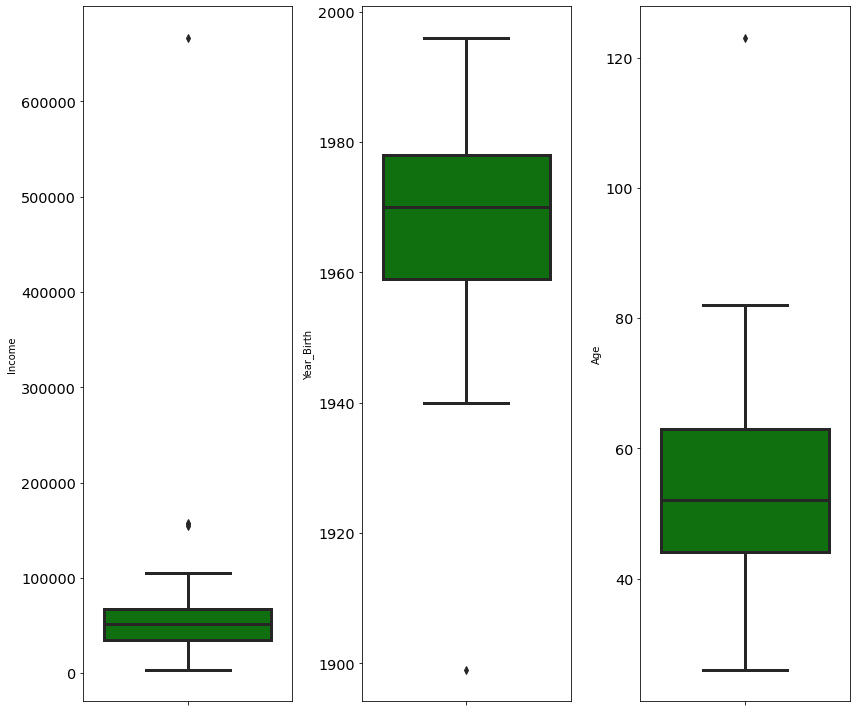

In [26]:
outliers = ['Income','Year_Birth','Age']
for i in range(0, len(outliers)):
  plt.subplot(1, len(outliers),i+1)
  sns.boxplot(y=train[outliers[i]],color="green",orient='v')
  plt.tight_layout()

In [27]:
for i in outliers:
  Q1 = train[i].quantile(.25)
  Q3 = train[i].quantile(.75)
  IQR = Q3 - Q1
  Batas_Atas = Q3 + 1.5*IQR
  Batas_Bawah = Q1 - 1.5*IQR
  print(f'Jumlah baris sebelum memfilter',i, 'outlier:', len(train))
  a = len(train)
  train=train[(train[i]<=Batas_Atas)&
              (train[i]>=Batas_Bawah)]

  print(f'Jumlah baris setelah memfilter',i, 'outlier:', len(train))
  b = len(train)
  print (f'persen yang dibuang : {100-((b/a)*100)}')

Jumlah baris sebelum memfilter Income outlier: 1763
Jumlah baris setelah memfilter Income outlier: 1759
persen yang dibuang : 0.22688598979013364
Jumlah baris sebelum memfilter Year_Birth outlier: 1759
Jumlah baris setelah memfilter Year_Birth outlier: 1758
persen yang dibuang : 0.05685048322911257
Jumlah baris sebelum memfilter Age outlier: 1758
Jumlah baris setelah memfilter Age outlier: 1758
persen yang dibuang : 0.0


#### Feature Transformation

1. Purchases LogTransformation

In [28]:
purchases = ['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases','Total_Purchases']
for i in purchases:
  train[i] = np.log(train[i])

C:\Users\asus\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


2. Produk LogTransformation

In [29]:
products = ['MntWines','MntFruits','MntMeatProducts', 'MntFishProducts','MntSweetProducts', 'MntGoldProds', 'Total_Prod']
for i in products:
  train[i] = np.log(train[i])

3. Year_Birth MinMaxScalar

In [30]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
MMS = MinMaxScaler()
train['Year_Birth'] = MMS.fit_transform(train['Year_Birth'].values.reshape(len(train),1))

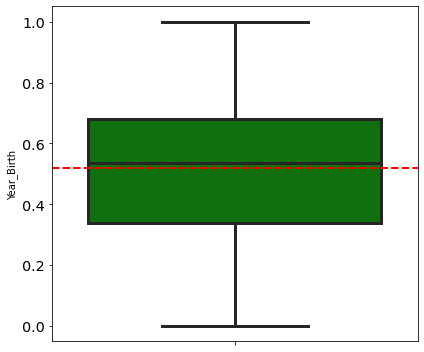

In [31]:
plt.figure(figsize=(6,5))
sns.boxplot(y=train['Year_Birth'],color="green")
plt.axhline(train['Year_Birth'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.tight_layout()

4. Age MinMaxScalar

In [32]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
MMS = MinMaxScaler()
train['Age'] = MMS.fit_transform(train['Age'].values.reshape(len(train),1))

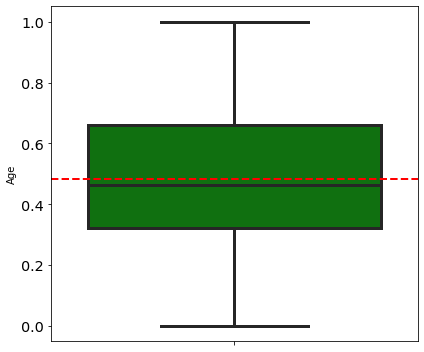

In [33]:
plt.figure(figsize=(6,5))
sns.boxplot(y=train['Age'],color="green")
plt.axhline(train['Age'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.tight_layout()

5. Income MinMaxScalar

In [34]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
MMS = MinMaxScaler()
train['Income'] = MMS.fit_transform(train['Income'].values.reshape(len(train),1))

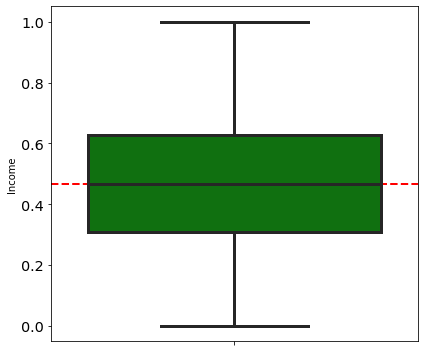

In [35]:
plt.figure(figsize=(6,5))
sns.boxplot(y=train['Income'],color="green")
plt.axhline(train['Income'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.tight_layout()

In [36]:
train.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'dependents', 'Age', 'Segmentation', 'Total_Prod', 'Total_Purchases'],
      dtype='object')

#### Feature Encoding

1. Marital_Status Label Encoding

In [37]:
train.Marital_Status.value_counts()

Married     692
Together    456
Single      374
Divorced    174
Widow        56
Alone         3
YOLO          2
Absurd        1
Name: Marital_Status, dtype: int64

In [38]:
train['Marital_Status2'] = np.where(train['Marital_Status'].isin(['Married','Together']),'In Pairs', 'Single')
train['Marital_Status2'].value_counts()

In Pairs    1148
Single       610
Name: Marital_Status2, dtype: int64

In [39]:
mapping_status = {'In Pairs':2,
                  'Single':1}
train['Marital_Status2']=train['Marital_Status2'].map(mapping_status)
train['Marital_Status2'].value_counts()

2    1148
1     610
Name: Marital_Status2, dtype: int64

2. Education Label Encoding

In [40]:
train['Education'].value_counts()

Graduation    895
PhD           382
Master        279
2n Cycle      159
Basic          43
Name: Education, dtype: int64

In [41]:
train['Education2'] = np.where(train['Education'].isin(['Basic','Graduation']),'S1',
                                  np.where(train['Education'].isin(['Master','2n Cycle']),'S2','S3'))
train['Education2'].value_counts()

S1    938
S2    438
S3    382
Name: Education2, dtype: int64

In [42]:
mapping_status = {'S1':1,
                  'S2':2,
                  'S3':3}
train['Education2']=train['Education2'].map(mapping_status)
train['Education2'].value_counts()

1    938
2    438
3    382
Name: Education2, dtype: int64

3. Segmentation One-Hot Encoding

In [43]:
train.Segmentation.value_counts()

Mature    925
Adult     667
Young     121
Old        45
Name: Segmentation, dtype: int64

In [44]:
traino = pd.get_dummies(train['Segmentation'], prefix = 'Segmen')
train = train.join(traino)

In [45]:
train.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'dependents', 'Age', 'Segmentation', 'Total_Prod', 'Total_Purchases',
       'Marital_Status2', 'Education2', 'Segmen_Adult', 'Segmen_Mature',
       'Segmen_Old', 'Segmen_Young'],
      dtype='object')

#### Feature Selection

In [54]:
y = train.Response
X = train.drop(['Response','ID','Recency','AcceptedCmp1', 'AcceptedCmp2','AcceptedCmp3','AcceptedCmp4',
            'AcceptedCmp5','Complain','Year_Birth', 'Education', 'Marital_Status','Kidhome',
            'Teenhome', 'Dt_Customer','Z_CostContact', 'Z_Revenue','Total_Purchases', 'Total_Prod','Education2',
            'Year_Birth','Education', 'Marital_Status','Age', 'Segmentation'], axis=1)

# shape of X and y
print('Shape of X: ',X.shape)
print('Shape of y: ',y.shape)

Shape of X:  (1758, 18)
Shape of y:  (1758,)


In [56]:
X.columns

Index(['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'dependents', 'Marital_Status2', 'Segmen_Adult',
       'Segmen_Mature', 'Segmen_Old', 'Segmen_Young'],
      dtype='object')

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('Shape of train: ','\n','X_train',X_train.shape,'y_train',y_train.shape)
print('Shape of test: ','\n','X_test',X_test.shape,'y_test',y_test.shape)

Shape of train:  
 X_train (1406, 18) y_train (1406,)
Shape of test:  
 X_test (352, 18) y_test (352,)


In [49]:
kelas0 = X [y==0]
kelas1 = X [y==1]

In [50]:
kelas0.shape, kelas1.shape

((1501, 18), (257, 18))

Ditemukannya Class Imbalance pada kolom Response (Target)

#### Class Imbalance

1. OverSampling

In [51]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
# y.value_counts()
print(sorted(Counter(y_resampled).items()),y_resampled.shape)

[(0, 1193), (1, 1193)] (2386,)


2. UnderSampling

In [52]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
rus = RandomUnderSampler(random_state=0)
X_resampled1, y_resampled1 = rus.fit_resample(X_train,y_train)
# y.value_counts()
print(sorted(Counter(y_resampled1).items()),y_resampled1.shape)

[(0, 213), (1, 213)] (426,)


In [53]:
X_resampled1

,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,dependents,Marital_Status2,Segmen_Adult,Segmen_Mature,Segmen_Old,Segmen_Young
0,0.626828,6.740519,4.430817,5.863631,4.510860,4.025352,3.737670,1.386294,2.197225,1.386294,2.079442,5,1,2,0,1,0,0
1,0.377870,2.397895,0.000000,1.386294,0.693147,-inf,1.945910,0.000000,0.000000,-inf,0.693147,7,2,2,0,1,0,0
2,0.268680,3.178054,-inf,2.079442,-inf,-inf,0.000000,0.693147,0.000000,-inf,1.098612,6,1,1,1,0,0,0
3,0.417774,2.639057,-inf,0.000000,-inf,-inf,0.000000,0.000000,0.000000,-inf,0.693147,7,3,1,0,1,0,0
4,0.400838,5.361292,1.609438,3.332205,1.945910,1.945910,3.713572,0.000000,1.386294,0.000000,1.791759,5,1,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0.115574,0.000000,0.693147,2.079442,1.386294,1.098612,2.564949,0.693147,0.000000,0.000000,0.693147,7,1,1,1,0,0,0
422,0.489129,6.192362,1.791759,5.023881,2.079442,1.791759,4.882802,2.302585,2.197225,1.386294,1.791759,8,2,2,0,1,0,0
423,0.696643,5.940171,4.584967,6.597146,4.700480,4.718499,3.332205,0.000000,2.079442,2.079442,1.609438,3,0,2,0,1,0,0
424,0.503163,4.143135,1.791759,4.043051,2.564949,2.564949,3.091042,1.386294,0.693147,0.000000,1.609438,4,2,2,1,0,0,0


In [57]:
X_resampled

,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,dependents,Marital_Status2,Segmen_Adult,Segmen_Mature,Segmen_Old,Segmen_Young
0,0.264443,0.000000,1.098612,2.079442,0.693147,1.609438,1.609438,0.000000,0.000000,-inf,0.693147,7,1,2,1,0,0,0
1,0.209672,0.000000,1.386294,2.302585,3.367296,-inf,3.583519,0.000000,0.000000,0.000000,0.693147,6,1,2,1,0,0,0
2,0.420442,6.011267,-inf,3.044522,-inf,-inf,2.833213,1.098612,1.945910,0.000000,1.945910,8,1,2,1,0,0,0
3,0.316400,3.091042,1.098612,3.401197,-inf,1.609438,2.708050,0.693147,0.693147,-inf,1.386294,6,1,2,0,0,0,1
4,0.332444,2.944439,1.098612,2.944439,1.098612,0.000000,1.098612,0.693147,0.693147,-inf,1.098612,7,1,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2381,0.420442,6.011267,-inf,3.044522,-inf,-inf,2.833213,1.098612,1.945910,0.000000,1.945910,8,1,2,1,0,0,0
2382,0.728300,6.911747,4.077537,5.579730,4.744932,4.077537,3.295837,0.693147,2.397895,2.302585,2.397895,6,1,2,0,1,0,0
2383,0.301180,3.912023,1.386294,3.332205,1.791759,1.098612,3.258097,1.098612,1.098612,0.000000,0.693147,9,2,1,0,1,0,0
2384,0.394963,5.176150,0.693147,4.262680,1.098612,0.693147,2.995732,1.791759,1.609438,0.693147,1.386294,8,2,2,0,1,0,0


### Data Siap dipakai ke Model

Data yang dipakai adalah yang oversampling

In [59]:
X_resampled.shape, y_resampled.shape

((2386, 18), (2386,))